In [4]:
from sklearn.datasets import fetch_openml

Q1_1

In [5]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X, y = mnist["data"], mnist["target"]

In [6]:
import matplotlib.pyplot as plt

#Q1_display each digit

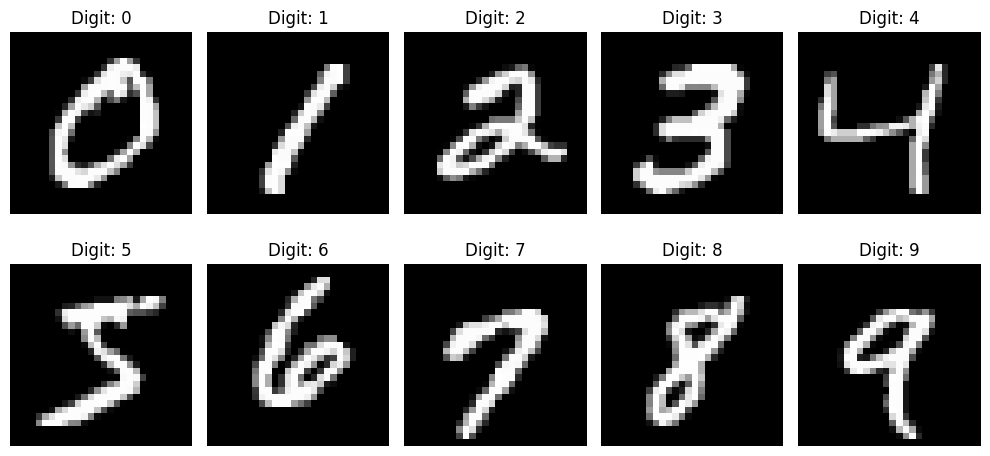

In [8]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i in range(10):
    digit = X[y == str(i)][0].reshape(28, 28)
    axes[i].imshow(digit, cmap='gray')
    axes[i].set_title(f'Digit: {i}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

#Q1_3

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[0.09746116 0.07155445]


#Q1_4

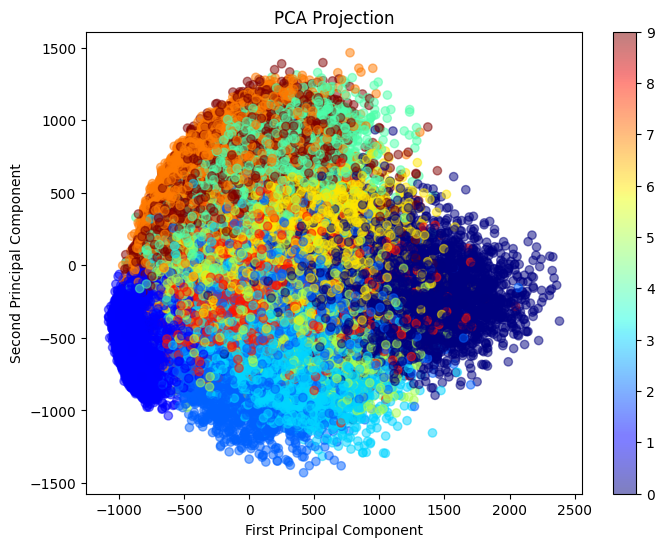

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.astype(int), cmap='jet', alpha=0.5)
plt.colorbar()
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Projection')
plt.show()

#Q1_5

In [12]:
from sklearn.decomposition import IncrementalPCA
import numpy as np

In [13]:
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X)

#Q1_6

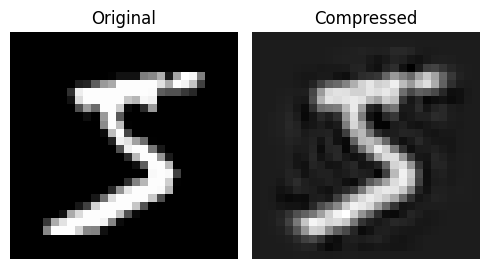

In [14]:
X_recovered = inc_pca.inverse_transform(X_reduced)

# Display original and compressed digits (for a specific digit, say 5)
digit_original = X[y == '5'][0].reshape(28, 28)
digit_compressed = X_recovered[y == '5'][0].reshape(28, 28)

plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)
plt.imshow(digit_original, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(digit_compressed, cmap='gray')
plt.title('Compressed')
plt.axis('off')

plt.tight_layout()
plt.show()

#Q2_1

In [16]:
from sklearn.datasets import make_swiss_roll

In [17]:
X, y = make_swiss_roll(n_samples=1000, noise=0.0, random_state=42)

#Q2_2

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

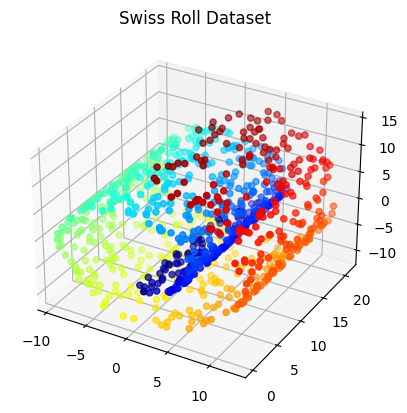

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='jet')
ax.set_title('Swiss Roll Dataset')
plt.show()

#Q2_3

In [21]:
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
lin_kpca = KernelPCA(kernel="linear", fit_inverse_transform=True)
rbf_kpca = KernelPCA(kernel="rbf", gamma=0.04, fit_inverse_transform=True)
sig_kpca = KernelPCA(kernel="sigmoid", gamma=0.001, coef0=0, fit_inverse_transform=True)

X_kpca_lin = lin_kpca.fit_transform(X)
X_kpca_rbf = rbf_kpca.fit_transform(X)
X_kpca_sig = sig_kpca.fit_transform(X_scaled)

#Q2_4

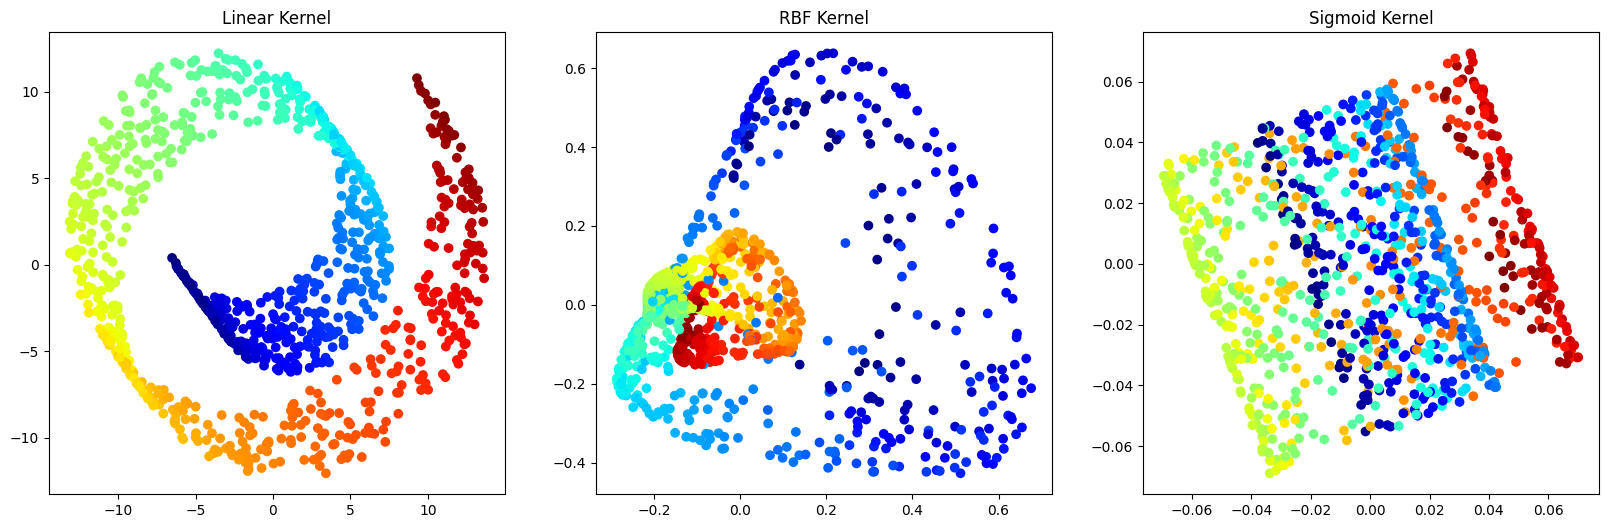

In [24]:
# Plotting the results
plt.figure(figsize=(20, 6))

# Linear Kernel
plt.subplot(1, 3, 1)
plt.scatter(X_kpca_lin[:, 0], X_kpca_lin[:, 1], c=y, cmap='jet')
plt.title('Linear Kernel')

# RBF Kernel
plt.subplot(1, 3, 2)
plt.scatter(X_kpca_rbf[:, 0], X_kpca_rbf[:, 1], c=y, cmap='jet')
plt.title('RBF Kernel')

# Sigmoid Kernel
plt.subplot(1, 3, 3)
plt.scatter(X_kpca_sig[:, 0], X_kpca_sig[:, 1], c=y, cmap='jet')
plt.title('Sigmoid Kernel')

plt.show()

#Q2_5

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [31]:
# Convert y into a binary target
y_binary = (y > y.mean()).astype(int)  # 1 if y is above the mean, 0 otherwise


clf = Pipeline([
    ('scaler', StandardScaler()),
    ('kpca', KernelPCA(n_components=2)),
    ('log_reg', LogisticRegression())
])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["linear", "rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y_binary)

print(grid_search.best_params_)

{'kpca__gamma': 0.04555555555555556, 'kpca__kernel': 'rbf'}


#Q2_6

In [32]:
import matplotlib.pyplot as plt

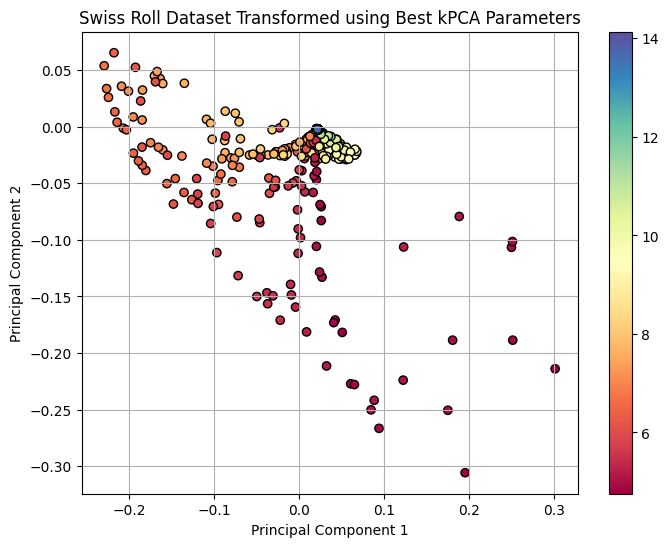

In [33]:
# Get the best estimator
best_kpca = grid_search.best_estimator_.named_steps['kpca']

# Transform the data using the best estimator
X_kpca_best = best_kpca.transform(X)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca_best[:, 0], X_kpca_best[:, 1], c=y, cmap=plt.cm.Spectral, edgecolor='k')
plt.title('Swiss Roll Dataset Transformed using Best kPCA Parameters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.grid(True)
plt.show()